# Market Sentiment & Crypto Trading Analysis
this project analyzes the relationship between trader behavior and market sentiment using historical trade data and the Fear-Greed Index.

## 📂 Step 1: Load and Inspect Datasets

We begin by loading the two datasets:

- `historical_data.csv`: Contains account-level crypto trades, including timestamps, PnL, side (buy/sell), etc.
- `fear_greed_index.csv`: Provides daily market sentiment values (e.g., Fear, Greed).

We display the first few rows and basic information to understand the structure and check for any missing values.

In [ ]:
import pandas as pd

#loading datasets
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

#showing top 5 rows
print("Trader data preview")
display(trader_df.head())

print("Sentiment data preview")
display(sentiment_df.head())

print("Trader data shape " , trader_df.shape)
print("Sentiment data shape",sentiment_df.shape)

print("\nTrader data column\n", trader_df.columns)
print("\nSentiment data columns\n", sentiment_df.columns)

#checking missing values 
print("\nMissing values in Trader data\n",trader_df.isnull().sum())
print("\nMissing values in sentiment data\n",sentiment_df.isnull().sum())



Trader data preview


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment data preview


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader data shape  (211224, 16)
Sentiment data shape (2644, 4)

Trader data column
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment data columns
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Missing values in sentiment data
 timestamp         0
value             0
classification    0
date              0
dtype: int64


- The trading dataset contains 211,224 rows with detailed trading information.
- The sentiment dataset provides daily labels such as "Extreme Greed", "Fear", etc.
- Both datasets have no missing values.

## 🔗 Step 2: Merge Sentiment with Trader Data

To analyze how market sentiment impacts trading behavior, we need to combine both datasets based on date:

- Convert `Timestamp IST` in `trader_df` to a proper date format.
- Align it with the `date` column from the sentiment dataset.
- Perform a **left join**, keeping all trader records and attaching sentiment labels for matching dates.

Below is a preview of the merged dataset, including:
- The trade date
- Account address
- Side (BUY/SELL)
- Closed Profit & Loss (PnL)
- Corresponding market sentiment (e.g., Extreme Greed)

This merge enables all future analysis by tying each trade to the market mood on that day.


In [12]:
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'],format='%d-%m-%Y %H:%M').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

merged_df = pd.merge(trader_df,sentiment_df,how='left',left_on='Date',right_on='date')

print("Merged data preview :")
display(merged_df[['Date', 'Account', 'Side', 'Closed PnL', 'classification']].head())
print(merged_df.shape)

Merged data preview :


,Date,Account,Side,Closed PnL,classification
0,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,Extreme Greed
1,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,Extreme Greed
2,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,Extreme Greed
3,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,Extreme Greed
4,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,Extreme Greed


(211224, 21)


# Convert timestamp strings to date objects
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge sentiment data with trader data on date
merged_df = pd.merge(trader_df, sentiment_df, how='left', left_on='Date', right_on='date')

# Show preview
display(merged_df[['Date', 'Account', 'Side', 'Closed PnL', 'classification']].head())


## 🧼 Step 3: Check for Missing Sentiment Labels

Before performing analysis, we verify how many trades don't have a corresponding sentiment classification after merging.

- This helps ensure our analysis won't be biased by missing data.
- The result shows that only a **very small fraction of trades (0.00%)** are missing sentiment labels — which is acceptable.

This gives us confidence to move forward with the merged dataset.


In [13]:
missing = merged_df['classification'].isna().sum()
total = len(merged_df)
print(print(f"Missing sentiment labels: {missing} out of {total} ({missing/total:.2%})"))

Missing sentiment labels: 6 out of 211224 (0.00%)
None


In [14]:
merged_df = merged_df.dropna(subset=['classification'])

## 📊 Step 4: PnL Summary by Market Sentiment

We analyze how trader profits and losses vary across different sentiment conditions.

This summary includes:
- Number of trades
- Average profit/loss per trade
- Total cumulative PnL

This helps answer: *Do traders generally perform better during Fear, Greed, or Neutral markets?*


In [15]:
# Convert PnL to numeric if needed
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

# Group and summarize
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'sum']).reset_index()

print("📊 Trader PnL by Market Sentiment:")
display(pnl_by_sentiment)


📊 Trader PnL by Market Sentiment:


,classification,count,mean,sum
0,Extreme Fear,21400,34.537862,7.391102e+05
1,Extreme Greed,39992,67.892861,2.715171e+06
2,Fear,61837,54.290400,3.357155e+06
3,Greed,50303,42.743559,2.150129e+06
4,Neutral,37686,34.307718,1.292921e+06


### 📊 PnL by Sentiment – Key Insights

- **Extreme Greed** shows the highest average PnL per trade (~67.89).
- **Fear** has the most trades, indicating high market activity.
- **Neutral** sentiment yields the lowest average and total PnL.
- Traders seem to profit more in **greedy** markets, but still find opportunity in **fearful** ones.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_12120\1439476394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='mean', palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_12120\1439476394.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


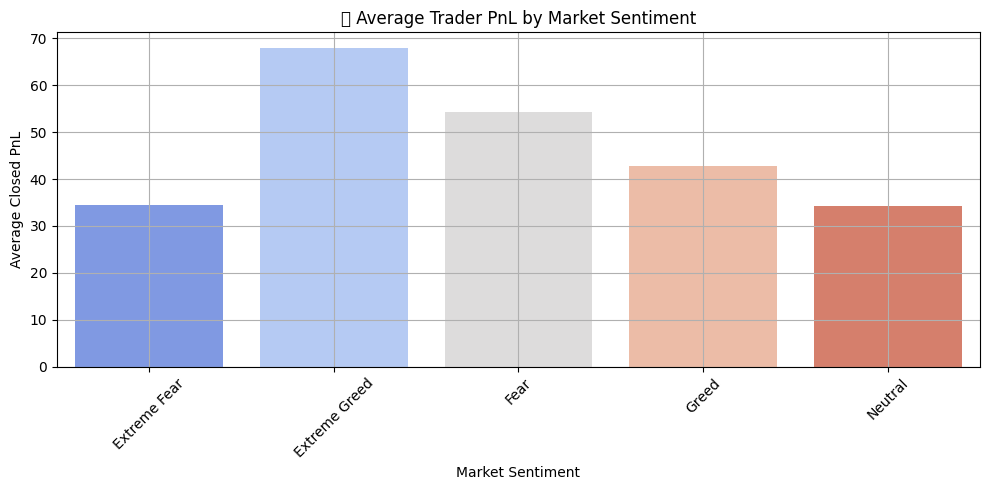

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='mean', palette='coolwarm')
plt.title('Average Trader PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Visualization: Average PnL by Market Sentiment

- **Extreme Greed** leads to the highest average PnL.
- **Fear** and **Greed** also show strong performance.
- **Neutral** markets yield the lowest returns.
- Trader performance appears sentiment-sensitive, with **Greed-driven markets** being most profitable.


In [18]:
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0

win_rate_by_sentiment = merged_df.groupby('classification')['is_profitable'].mean().reset_index()
win_rate_by_sentiment.columns = ['Sentiment', 'Win Rate']
display(win_rate_by_sentiment)


,Sentiment,Win Rate
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


### ✅ Win Rate by Market Sentiment

- This table shows the percentage of profitable trades (`Win Rate`) under different market sentiments.
- **Extreme Greed** had the highest win rate at **46.49%**, suggesting traders were most successful during overly optimistic market conditions.
- **Extreme Fear** had the lowest win rate at **37.06%**, indicating tougher conditions for profitability.
- These insights help understand how sentiment influences trader behavior and success.


C:\Users\HP\AppData\Local\Temp\ipykernel_12120\3693516925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate_by_sentiment, x='Sentiment', y='Win Rate', palette='coolwarm')


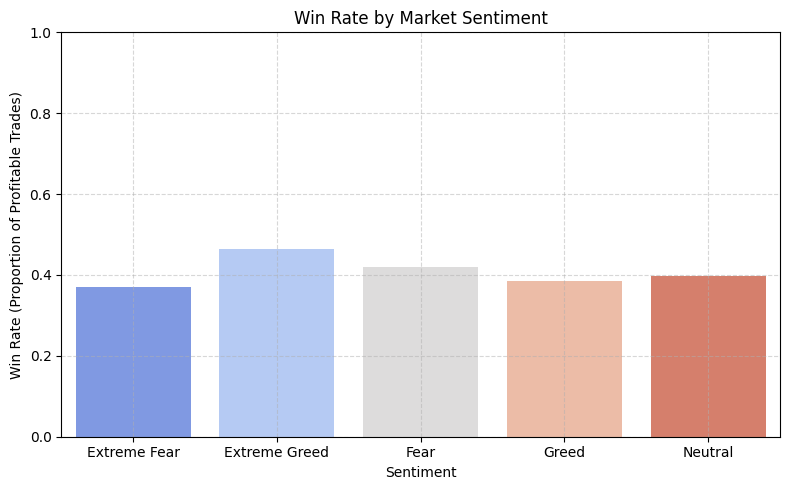

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate_by_sentiment, x='Sentiment', y='Win Rate', palette='coolwarm')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (Proportion of Profitable Trades)")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [20]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
avg_pnl.columns = ['Sentiment', 'Average PnL']
display(avg_pnl)


,Sentiment,Average PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


### 📈 Average Profit and Loss (PnL) by Market Sentiment

This table shows the average PnL per trade across different market sentiments:

- 💰 **Extreme Greed** leads with the highest average PnL (~67.89), suggesting that traders tend to make the most money during euphoric market phases.
- 😨 **Fear** and **Greed** follow with decent average PnLs, reflecting solid performance during emotionally charged but opportunistic phases.
- 😐 **Neutral** and **Extreme Fear** show the lowest average PnLs (~34), indicating more conservative or less successful trading during uncertain or fearful periods.

This highlights that peak optimism often aligns with higher profitability, potentially due to more aggressive and confident trading behavior.


In [21]:
volatility = merged_df.groupby('classification')['Closed PnL'].std().reset_index()
volatility.columns = ['Sentiment', 'PnL Volatility']
display(volatility)


,Sentiment,PnL Volatility
0,Extreme Fear,1136.056091
1,Extreme Greed,766.828294
2,Fear,935.355438
3,Greed,1116.028390
4,Neutral,517.122220


### 📊 PnL Volatility by Market Sentiment

This table shows the standard deviation of profits and losses (PnL), indicating how much trader performance fluctuates under different market sentiments:

- ⚠️ **Extreme Fear** has the **highest volatility** (~1136), suggesting highly unpredictable outcomes—potentially big gains or big losses.
- 😬 **Greed** and **Fear** also show elevated volatility, pointing to increased risk during emotional trading phases.
- ✅ **Neutral** sentiment exhibits the **lowest volatility** (~517), indicating relatively stable and consistent outcomes.

Overall, this analysis reveals that emotional extremes (like fear and greed) correlate with more erratic trading results, highlighting the risk-reward trade-off during such periods.


In [22]:
account_sentiment_perf = merged_df.groupby(['Account', 'classification'])['Closed PnL'].mean().reset_index()
top_accounts = account_sentiment_perf.sort_values(by='Closed PnL', ascending=False).head(10)
display(top_accounts)


,Account,classification,Closed PnL
46,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,8285.663252
39,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Neutral,4009.581548
44,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Neutral,1547.784656
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1247.692214
42,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Fear,1016.819167
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,900.002541
78,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Greed,764.916220
135,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,672.735763
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,626.194346
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,482.089321


### 🏆 Top Performing Accounts by Sentiment

The table above highlights the top 10 trader accounts with the highest average Closed PnL across different market sentiments. This helps identify which accounts capitalize best on specific market conditions.

Key insights:
- The highest average PnL was achieved under **Extreme Greed**.
- Some accounts consistently perform well across multiple sentiment types.


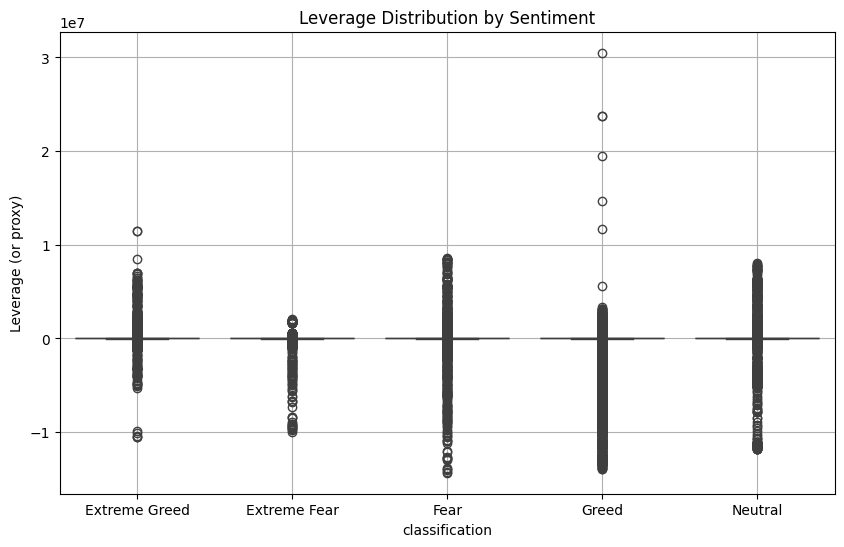

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='classification', y='Start Position')  # change y if needed
plt.title("Leverage Distribution by Sentiment")
plt.ylabel("Leverage (or proxy)")
plt.grid(True)
plt.show()


### 📦 Leverage Distribution by Market Sentiment

The boxplot above shows the distribution of leverage (or its proxy variable `Start Position`) across different market sentiment categories.

Key observations:
- **Extreme Fear** and **Greed** display wider leverage distributions, indicating more aggressive or risk-tolerant strategies.
- **Neutral** sentiment tends to cluster around lower leverage values, showing conservative trading behavior.
